In [31]:
import numpy as np
import pandas as pd
from math import log2
import copy
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
filepath="/Data.csv"

In [33]:
def data_extract(filename):
  data=pd.read_csv(filepath)
  # data=data.sort_values('age')
  X = np.array(data["slope"])
  Y = np.array(data["num"])

  return X,Y

In [34]:
X,Y=data_extract(filepath)
print(X)
print(Y)

[3. 2. 2. 3. 1. 1. 3. 1. 2. 3. 2. 2. 2. 1. 1. 1. 3. 1. 1. 1. 2. 1. 2. 1.
 2. 2. 1. 3. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 1. 3. 1. 1. 1. 1. 1. 2. 2. 1. 3. 1. 2. 3. 2. 1. 2. 2. 2. 1. 3. 2. 1. 2.
 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 3. 2. 2. 1. 1.
 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2.
 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2.
 2. 1. 2. 2. 1. 2. 1. 1. 3. 2. 2. 1. 1. 2. 2. 3. 2. 2. 3. 2. 1. 1. 2. 1.
 1. 1. 2. 2. 3. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 3. 2.
 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1.
 2. 2. 1. 3. 1. 1. 3. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1.
 2. 1. 2. 2. 1. 1. 1. 2. 3. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2.
 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1. 2. 1. 1. 3. 2. 2. 1. 3. 2. 1. 3.

In [35]:
def Training_Testing_data_extract(X,Y):
  n = X.shape[0]
  m=int(n*0.75)

  X_train=X[:m]
  Y_train=Y[:m]

  X_test=X[m:]

  Y_test=Y[m:]
  return X_train,Y_train,X_test,Y_test

In [36]:
X_train,Y_train,X_test,Y_test=Training_Testing_data_extract(X,Y)
# X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train)
print(X_test)


[3. 2. 2. 3. 1. 1. 3. 1. 2. 3. 2. 2. 2. 1. 1. 1. 3. 1. 1. 1. 2. 1. 2. 1.
 2. 2. 1. 3. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 1. 3. 1. 1. 1. 1. 1. 2. 2. 1. 3. 1. 2. 3. 2. 1. 2. 2. 2. 1. 3. 2. 1. 2.
 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 3. 2. 2. 1. 1.
 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2.
 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2.
 2. 1. 2. 2. 1. 2. 1. 1. 3. 2. 2. 1. 1. 2. 2. 3. 2. 2. 3. 2. 1. 1. 2. 1.
 1. 1. 2. 2. 3. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 3. 2.
 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1.
 2. 2. 1. 3. 1. 1. 3. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2.]
[2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 3. 1. 2. 1. 1. 1.
 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2.
 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 3. 2. 2. 1. 3.
 2. 1. 

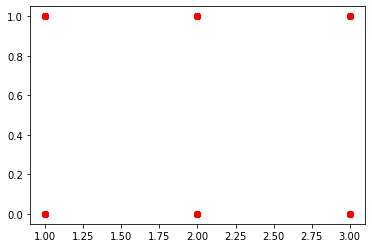

In [47]:
plt.plot(X_train,Y_train,'ro')


In [37]:
def count_target_yes_no(Y_train):
  target_yes=0
  target_no=0
  for i in range(len(Y_train)):
    if Y_train[i]==0:
      target_no=target_no+1
    else:
      target_yes=target_yes+1
  
  return target_no,target_yes

In [38]:
target_no,target_yes=count_target_yes_no(Y_train)
print(target_no)
print(target_yes)

140
114


In [39]:
def entropy(pos, neg):
    total = pos + neg
    p_pos = pos / total
    p_neg = neg / total
    return -(p_pos * log2(p_pos)) - (p_neg * log2(p_neg))

In [40]:
def I_gain(target_yes,target_no,pos,neg):
    tot=target_yes+target_no
    p_pos = target_yes / tot
    p_neg = target_no / tot
    ent=-(p_pos * log2(p_pos)) - (p_neg * log2(p_neg))
    total = target_yes + target_no
    left = pos + neg
    right = total - left
    return ent - (left / total) * entropy(pos, neg) - (right / total) * entropy(target_yes - pos, target_no - neg)

In [41]:
def finding_the_node(X_train,Y_train,cnt1,cnt2,cnt3,cnt4,target_no,target_yes):

  slope=0
  for i in range(len(X_train)-1):
    if Y_train[i] == 1:
      if X_train[i] == 1:
        cnt1 += 1
      elif X_train[i] == 2:
        cnt2 += 1
      else:
        continue

    else:
      if X_train[i] == 1:
        cnt3 += 1
      elif X_train[i] == 2:
        cnt4 += 1
      else:
        continue
  I_1=I_gain(target_yes,target_no,cnt1,cnt3)
  I_2=I_gain(target_yes,target_no,cnt1+cnt2,cnt3+cnt4)

  if I_1<I_2:
    slope=0
  else:
    slope=1
  return slope,max(I_1,I_2)

In [42]:
slope,I_gain=finding_the_node(X_train,Y_train,0,0,0,0,target_no,target_yes)

**Slope**

In [43]:
print("slope ",slope)

slope  1


In [44]:
print("I_gain ",I_gain)

I_gain  0.09859932828110707


**Accuracy**

In [45]:
def find_accuracy(X_test,Y_test):
  tot=0
  for i in range(len(X_test)):
    target=0
    if X_test[i]>slope:
      target=1
      
    if target==Y_test[i]:
      tot=tot+1
  acc=tot/len(X_test)
  return acc

In [46]:
acc=find_accuracy(X_test,Y_test)
print(acc*100)

65.88235294117646
